In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from sklearn.model_selection import train_test_split

In [3]:
# Lets read the data
df = pd.read_csv('vehicle.csv')

Prepossesing of data

In [8]:
# lets have a look inside the data
df.sample(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
342,83,37.0,54.0,131.0,61.0,4,135.0,50.0,18.0,127,152.0,271.0,141.0,85.0,3.0,6.0,180.0,183,car
28,102,45.0,85.0,193.0,64.0,6,192.0,33.0,22.0,146,217.0,570.0,163.0,76.0,6.0,7.0,195.0,193,bus
341,86,40.0,75.0,146.0,62.0,6,140.0,48.0,18.0,135,158.0,290.0,162.0,72.0,3.0,21.0,183.0,190,car
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,van
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
508,95,46.0,92.0,159.0,63.0,11,160.0,42.0,20.0,157,176.0,372.0,171.0,70.0,7.0,21.0,189.0,200,van
202,111,54.0,103.0,171.0,50.0,11,221.0,30.0,25.0,172,227.0,727.0,201.0,69.0,15.0,6.0,190.0,198,car
743,98,48.0,101.0,203.0,65.0,9,197.0,33.0,23.0,152,216.0,584.0,174.0,68.0,2.0,5.0,189.0,197,car
732,85,45.0,73.0,167.0,69.0,8,143.0,46.0,18.0,148,173.0,307.0,176.0,71.0,2.0,0.0,190.0,199,van
172,94,45.0,81.0,166.0,67.0,9,145.0,46.0,19.0,147,164.0,313.0,179.0,66.0,11.0,14.0,194.0,202,van


In [6]:
#what are the data types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [16]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [18]:
df = df.replace('', np.nan)


In [19]:
X = df.drop(columns=['class'])

In [20]:
X = X.apply(lambda x: x.fillna(x.median()),axis=0)

In [21]:
X.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [22]:
y_class = df['class']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [25]:
y_class = pd.Categorical(y_class).codes # Replace strings with an integer

In [28]:
# For 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

In [31]:
# Lets analyse the data

X.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


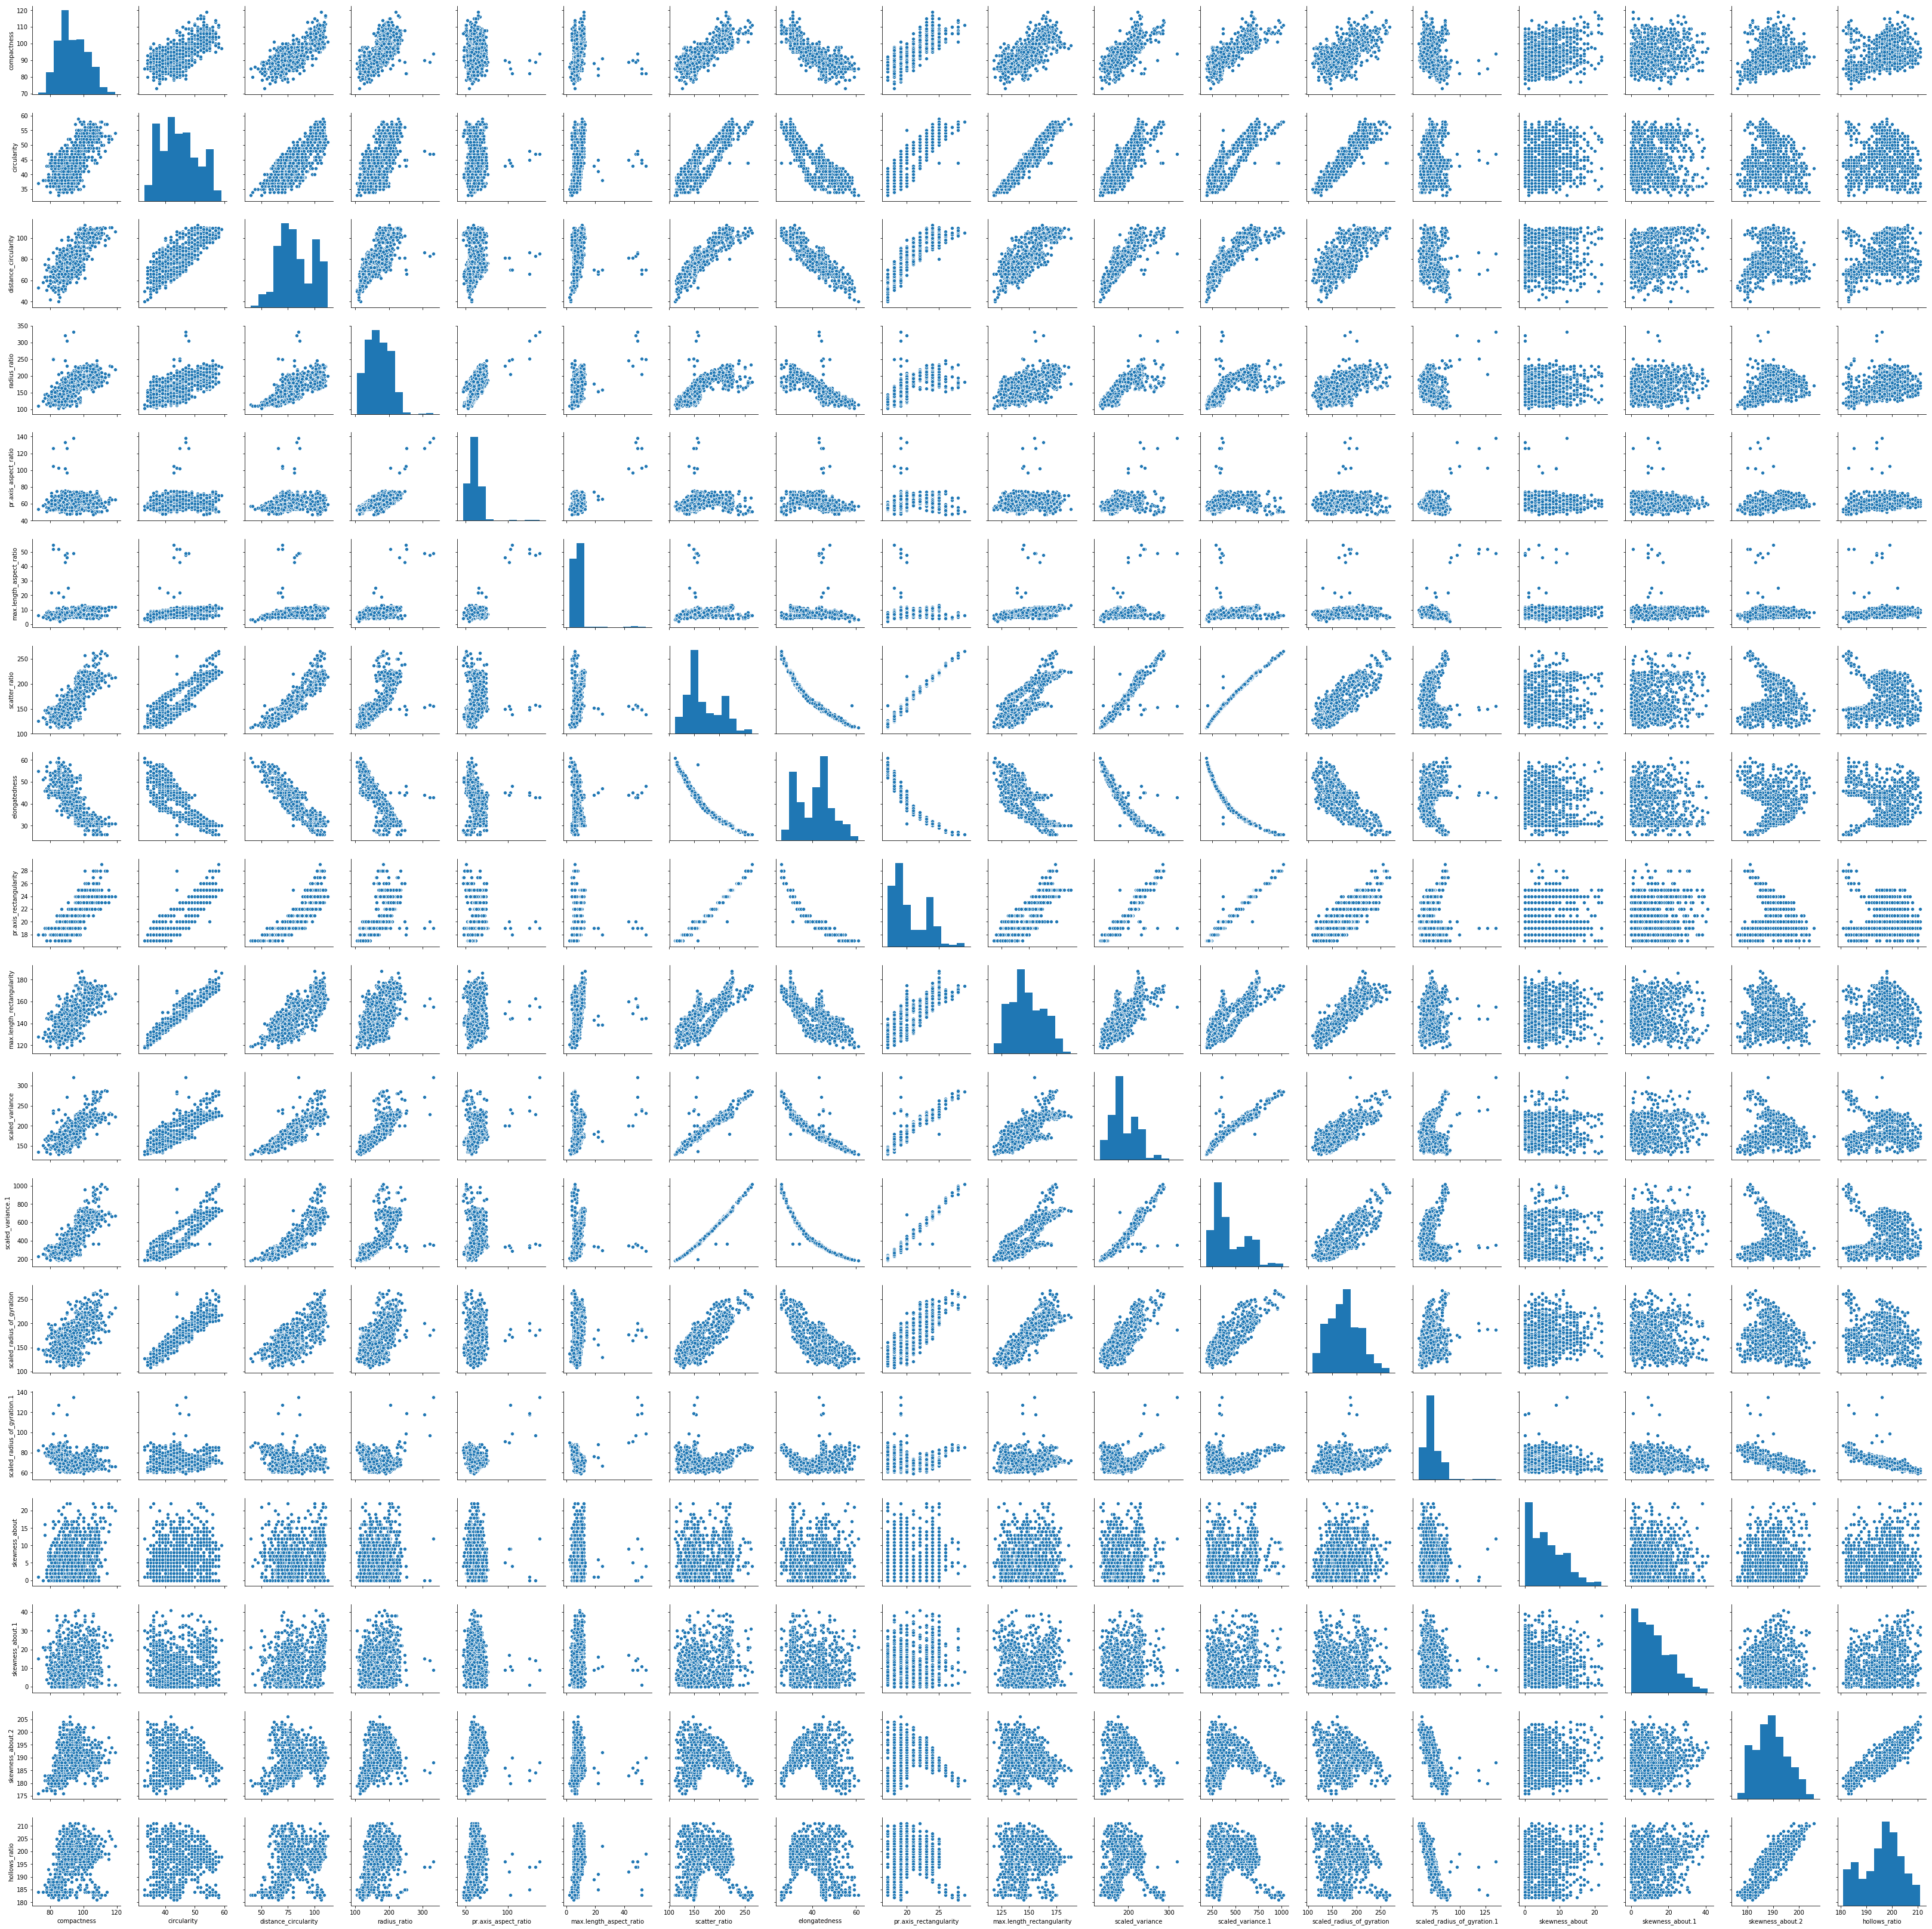

In [32]:
# Lets check for the relation between independent variables
import seaborn as sns
sns.pairplot(X)

In [33]:
# Most of the variables seems to be normaly destributed, Some of them are skewed.
# Some of the variables have high correlation. Lets check for the correlation

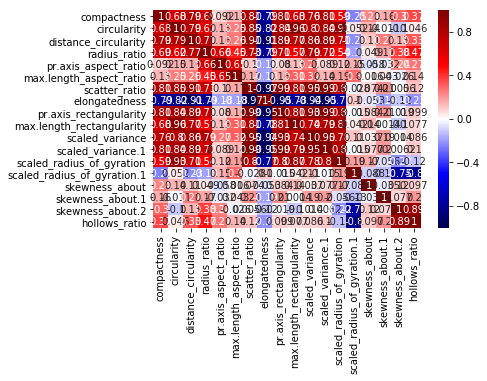

In [34]:
#heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix

corr = X.corr()

sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

In [ ]:
# As can be seen from the colors pr dark colors


In [36]:
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

In [37]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

In [38]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [39]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,9.404603,3.014922,1.903525,1.179937,0.917261,0.539993,0.35887,0.221932,0.160609,0.091857,0.066499,0.046601,0.035795,0.002964,0.010026,0.027412,0.017917,0.020579


In [40]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


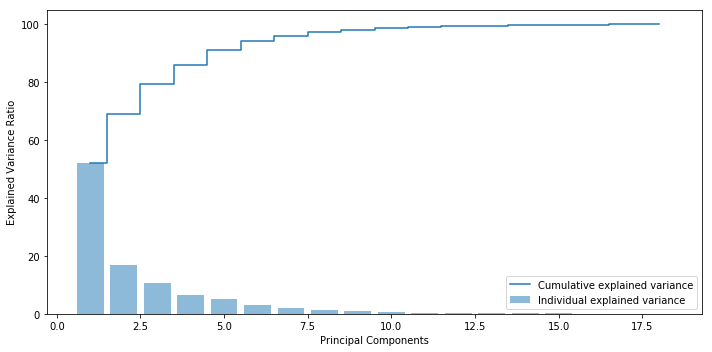

In [41]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [42]:
# initial 7 dimentions represents most of the variance 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Splitting data into training set and test set for linear regression model which is a supervised method 
# Centralize the data with standard scalar

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3 , random_state=1)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 18  to 7)
# Intial 7 dimentions explains the 96 % of the variance

X_train_reduced = PCA(n_components=7).fit_transform(X_train_std)
X_test_reduced = PCA(n_components=7).fit_transform(X_test_std)